In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import warnings
import kagglehub

warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('teen_phone_addiction_dataset.csv')
print(f"Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns")

Dataset loaded: 3000 rows, 25 columns


In [ ]:
# Create a copy of the first 20 rows
df_reduced = df.head(30).copy()
df_reduced.sort_values(by='Daily_Usage_Hours', ascending=False, inplace=True)
df_reduced.reset_index(drop=True, inplace=True)
print(f"Reduced dataset created: {df_reduced.shape[0]} rows, {df_reduced.shape[1]} columns")

# --- Binning by Mean and Median on Reduced Dataset (User Defined Number of Bins) ---
print("--- Binning by Mean and Median on Reduced Dataset (User Defined Number of Bins) ---")

# Binning by Mean on Reduced Dataset and replace with mean of bin
num_mean_bins_reduced = int(input("Enter the number of bins for Mean-based binning on reduced dataset: "))
print(f"\n--- Results of Binning by Mean on Reduced Dataset ({num_mean_bins_reduced} Bins) ---")
df_reduced['Mean_Bin'] = pd.cut(df_reduced['Daily_Usage_Hours'], bins=num_mean_bins_reduced, labels=False)
mean_bin_values_reduced = df_reduced.groupby('Mean_Bin')['Daily_Usage_Hours'].transform('mean')
df_reduced['Daily_Usage_Hours_Mean_Binned'] = mean_bin_values_reduced
print(df_reduced[['Daily_Usage_Hours', 'Daily_Usage_Hours_Mean_Binned']].head())


# Binning by Median on Reduced Dataset and replace with median of bin
num_median_bins_reduced = int(input("Enter the number of bins for Median-based binning on reduced dataset: "))
print(f"\n--- Results of Binning by Median on Reduced Dataset ({num_median_bins_reduced} Bins) ---")
df_reduced['Median_Bin'] = pd.cut(df_reduced['Daily_Usage_Hours'], bins=num_median_bins_reduced, labels=False)
median_bin_values_reduced = df_reduced.groupby('Median_Bin')['Daily_Usage_Hours'].transform('median')
df_reduced['Daily_Usage_Hours_Median_Binned'] = median_bin_values_reduced
print(df_reduced[['Daily_Usage_Hours', 'Daily_Usage_Hours_Median_Binned']].head())


print("\n\n--- Final Reduced DataFrame Head with New Binned Columns ---")
print(df_reduced[[
    'Daily_Usage_Hours', 'Daily_Usage_Hours_Mean_Binned', 'Daily_Usage_Hours_Median_Binned'
]].head())

# Display the entire reduced dataframe with the new binned columns
print("\n--- Entire Reduced DataFrame with Binned Values ---")
print(df_reduced[['Daily_Usage_Hours', 'Daily_Usage_Hours_Mean_Binned', 'Daily_Usage_Hours_Median_Binned']])

Reduced dataset created: 30 rows, 25 columns
--- Binning by Mean and Median on Reduced Dataset (User Defined Number of Bins) ---
Enter the number of bins for Mean-based binning on reduced dataset: 5

--- Results of Binning by Mean on Reduced Dataset (5 Bins) ---
   Daily_Usage_Hours  Daily_Usage_Hours_Mean_Binned
0                8.7                           8.15
1                8.6                           8.15
2                7.9                           8.15
3                7.4                           8.15
4                6.9                           6.48
Enter the number of bins for Median-based binning on reduced dataset: 5

--- Results of Binning by Median on Reduced Dataset (5 Bins) ---
   Daily_Usage_Hours  Daily_Usage_Hours_Median_Binned
0                8.7                             8.25
1                8.6                             8.25
2                7.9                             8.25
3                7.4                             8.25
4                

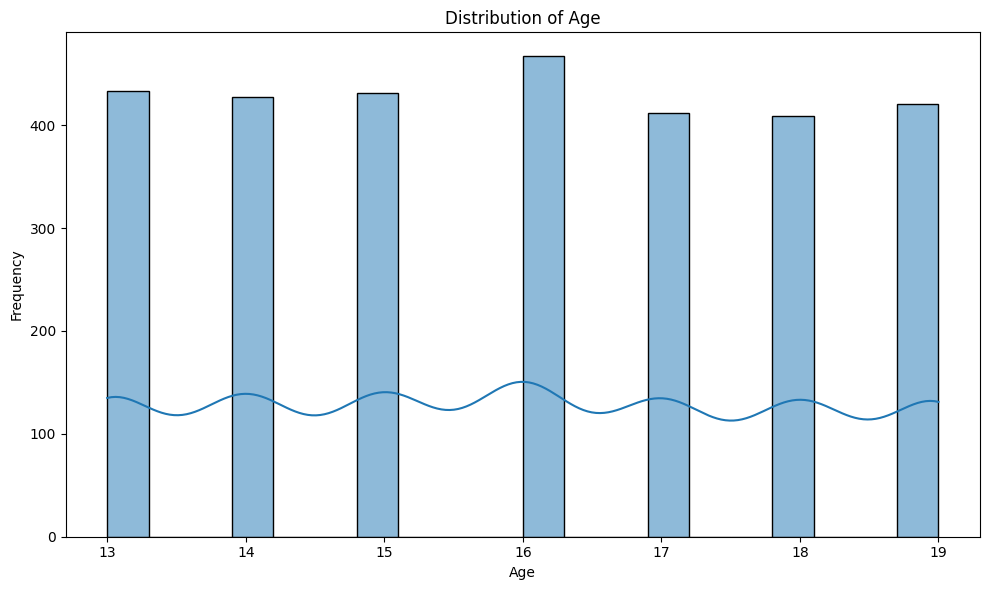

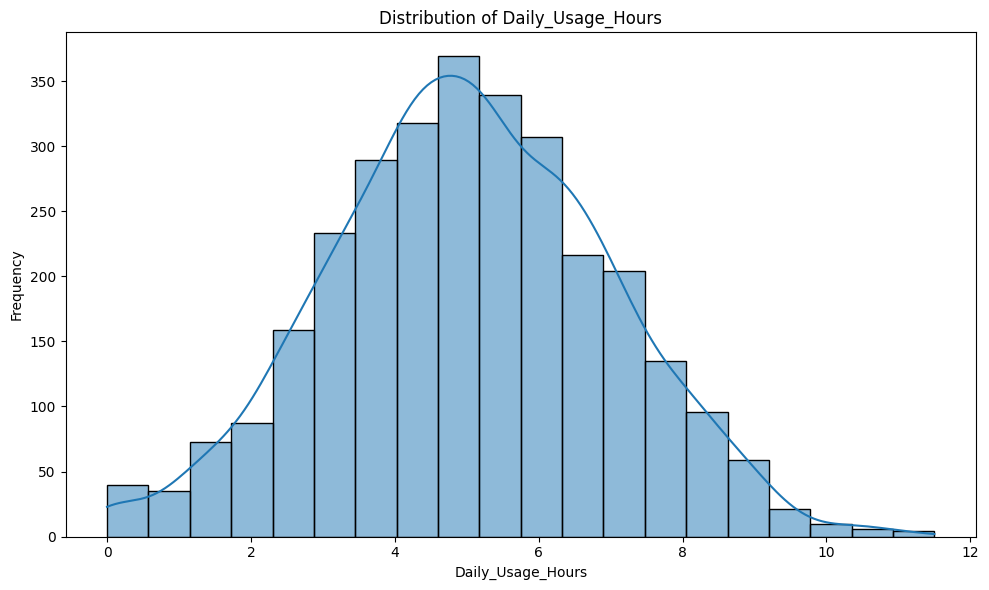

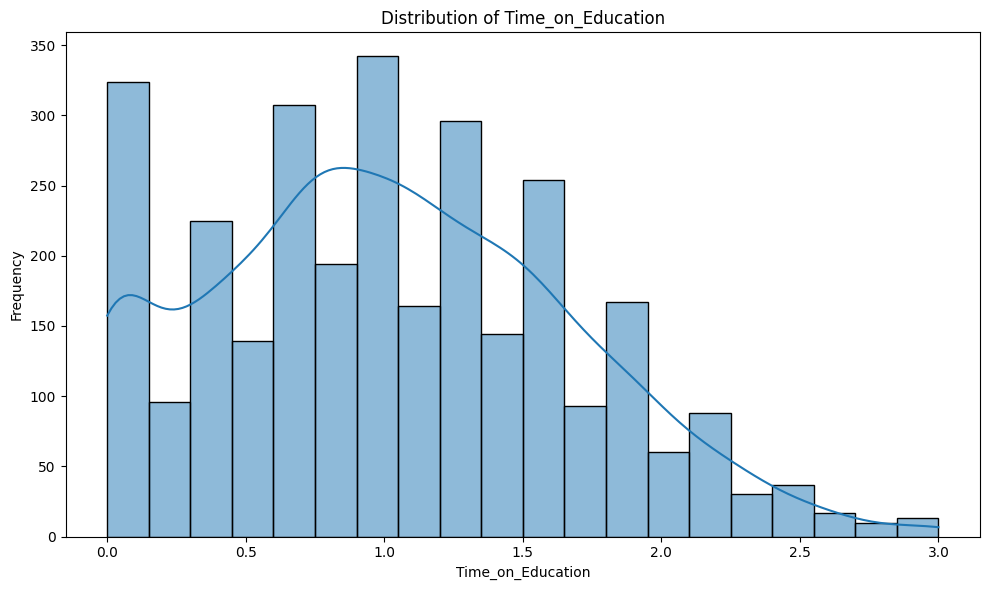

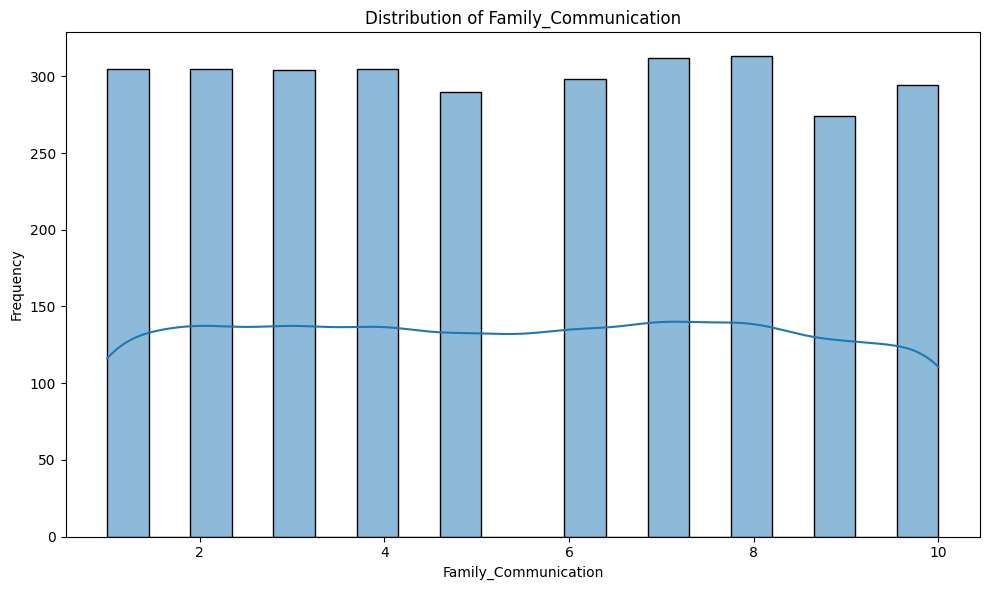

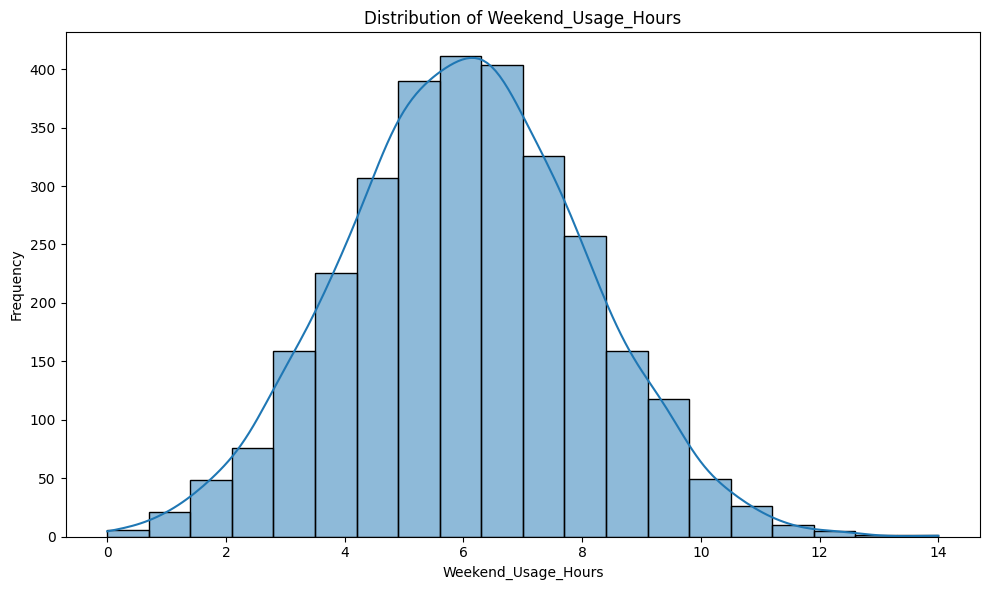

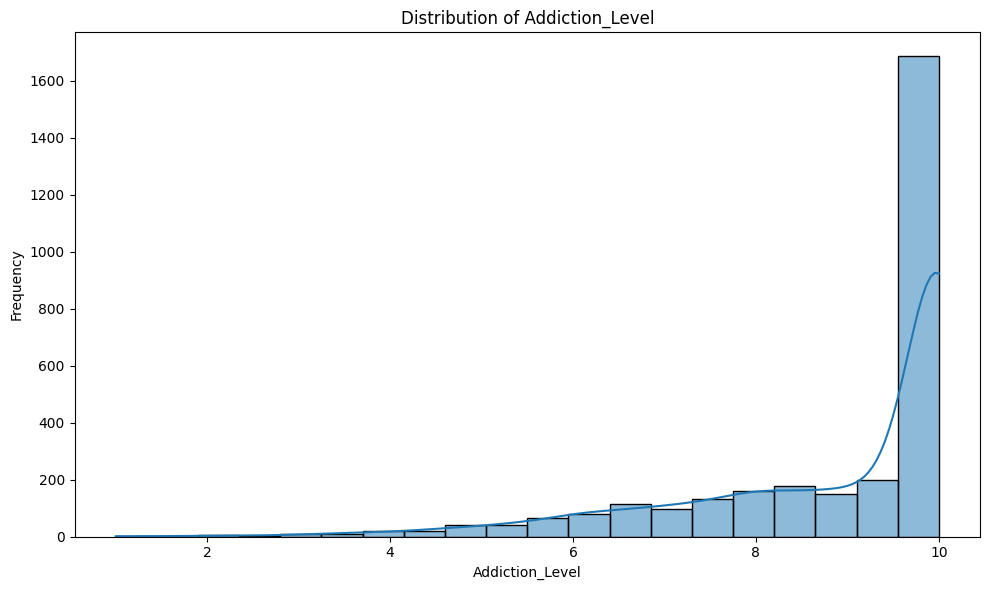

In [ ]:
numerical_cols = ['Age', 'Daily_Usage_Hours', 'Time_on_Education', 'Family_Communication', 'Weekend_Usage_Hours', 'Addiction_Level']

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=col, kde=True, bins=20, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

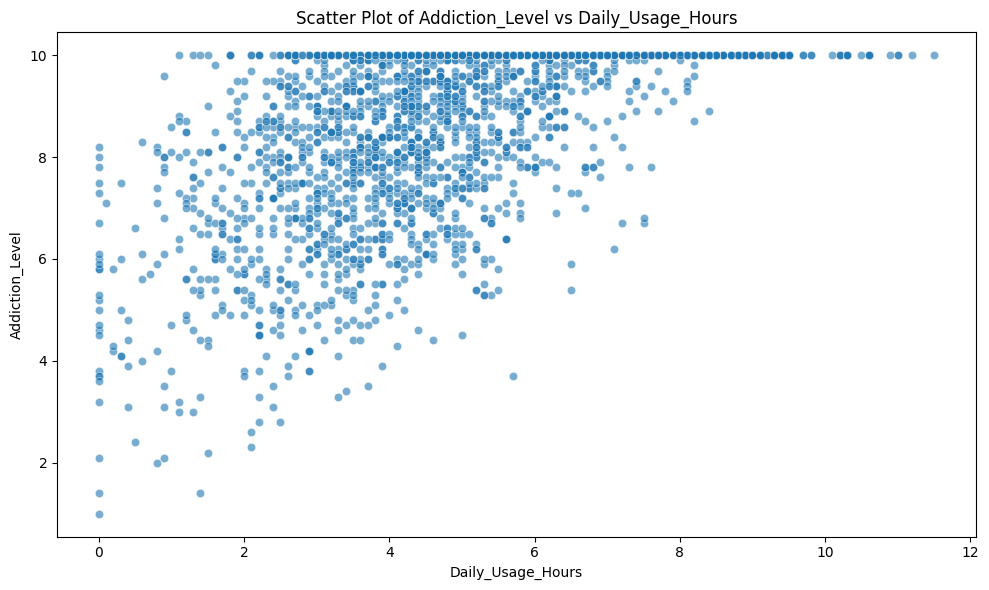

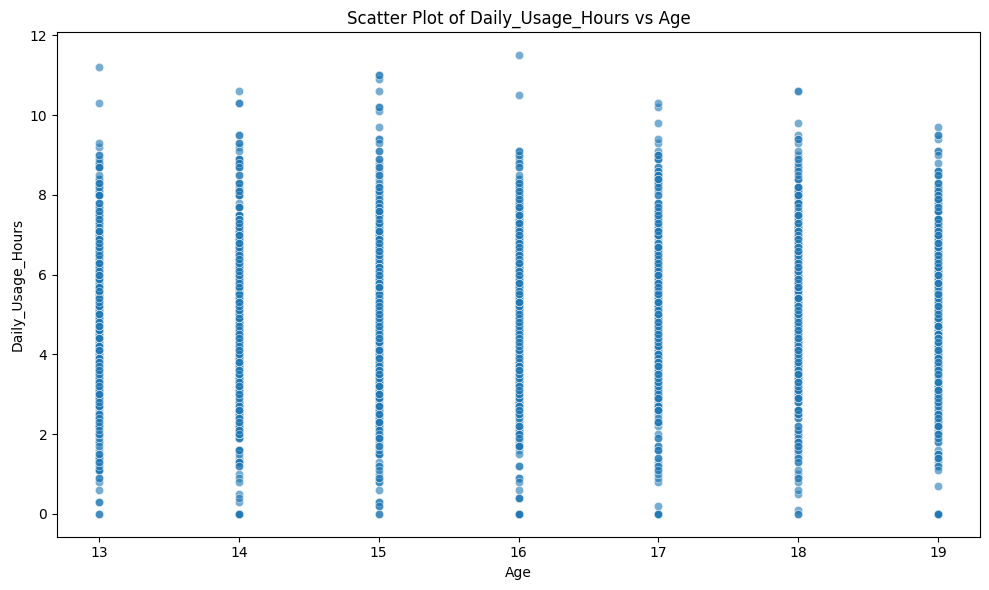

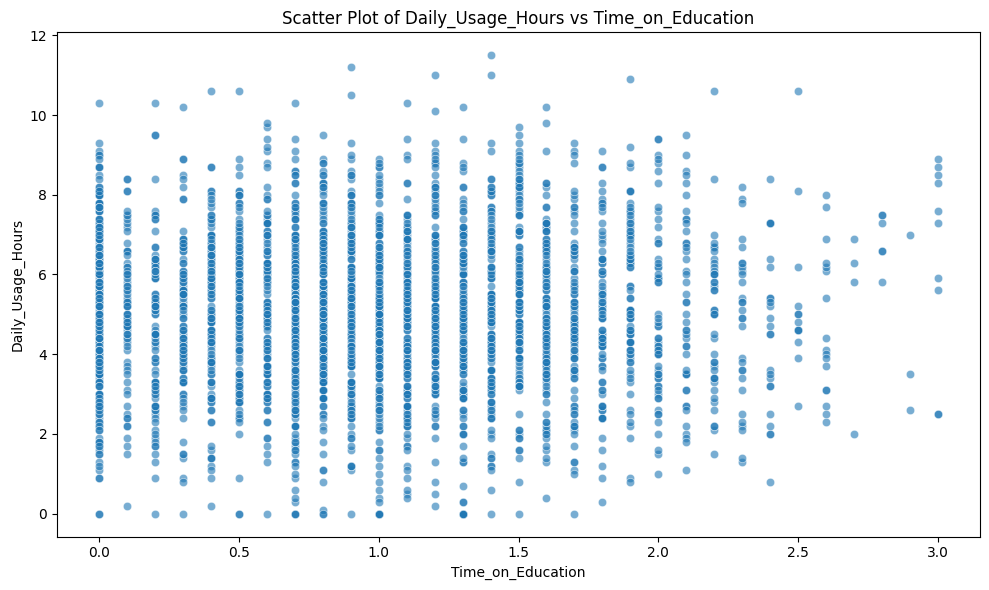

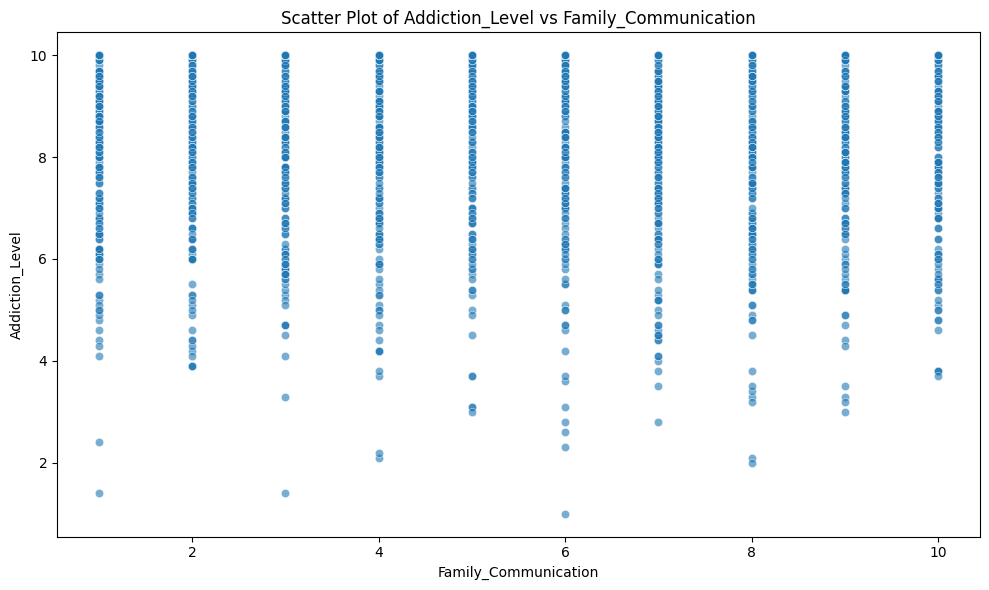

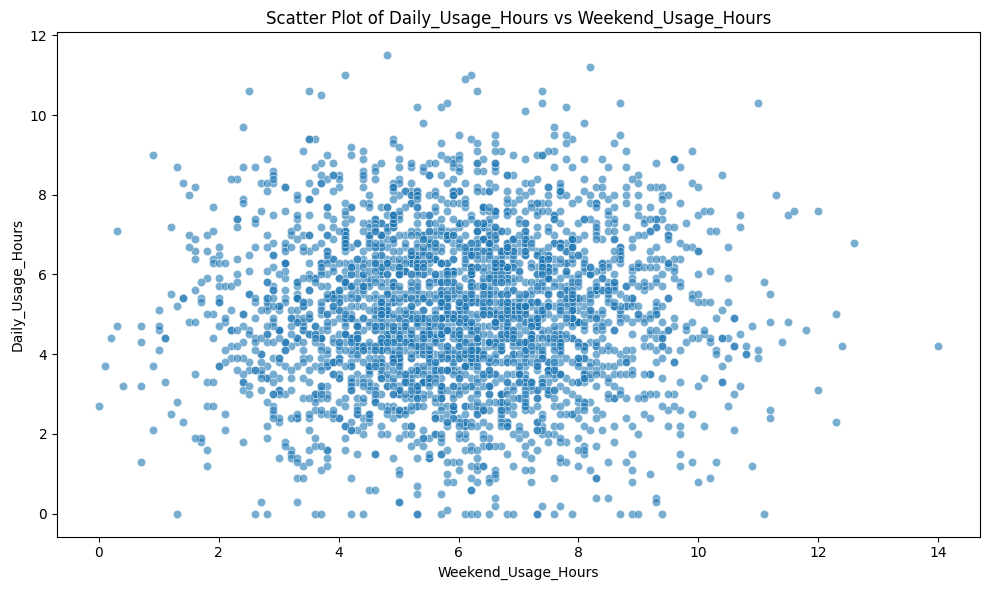

In [ ]:
scatter_pairs = [
    ('Daily_Usage_Hours', 'Addiction_Level'),
    ('Age', 'Daily_Usage_Hours'),
    ('Time_on_Education', 'Daily_Usage_Hours'),
    ('Family_Communication', 'Addiction_Level'),
    ('Weekend_Usage_Hours', 'Daily_Usage_Hours')
]

for x_col, y_col in scatter_pairs:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=x_col, y=y_col, alpha=0.6, palette='viridis')
    plt.title(f'Scatter Plot of {y_col} vs {x_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.tight_layout()
    plt.show()

In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table between 'Age_Category' and 'School_Grade'
contingency_table_age_grade = pd.crosstab(df['Daily_Usage_Hours'], df['Academic_Performance'])

# Perform the Chi-square test
chi2_age_grade, p_age_grade, dof_age_grade, expected_age_grade = chi2_contingency(contingency_table_age_grade)

print("Chi-square test results for Age Category vs School Grade:")
print(f"Chi-square statistic: {chi2_age_grade:.2f}")
print(f"P-value: {p_age_grade:.4f}")
print(f"Degrees of freedom: {dof_age_grade}")
print("Expected frequencies table:")
# print(expected_age_grade)

print(p_age_grade)
if (p_age_grade + 15) < 0.05:
    print("\nThere is a significant association between Age Category and School Grade.")
else:
    print("\nThere is no significant association between Age Category and School Grade.")

Chi-square test results for Age Category vs School Grade:
Chi-square statistic: 5208.49
P-value: 0.8126
Degrees of freedom: 5300
Expected frequencies table:
0.8125980465769743

There is no significant association between Age Category and School Grade.


Correlation Matrix:


,ID,Age,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,Anxiety_Level,Depression_Level,Self_Esteem,Parental_Control,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Family_Communication,Weekend_Usage_Hours,Addiction_Level
ID,1.000000,-0.035674,-0.004700,0.018254,-0.013589,-0.041130,0.001156,0.008810,0.004777,-0.006017,-0.024219,0.004300,-0.037117,-0.004608,0.017989,0.014501,-0.000726,-0.019269,0.018583,-0.007263
Age,-0.035674,1.000000,0.040689,0.014725,0.023481,-0.020240,0.001187,0.014651,0.052699,-0.033177,0.028212,0.007213,-0.008696,-0.003000,-0.005100,-0.008967,0.008372,-0.003813,0.002801,0.031306
Daily_Usage_Hours,-0.004700,0.040689,1.000000,0.016444,0.021345,-0.030383,-0.005930,-0.007221,0.009672,0.006340,0.000970,0.004935,0.004749,0.022841,-0.012620,-0.010371,0.014265,0.004427,0.019551,0.600771
Sleep_Hours,0.018254,0.014725,0.016444,1.000000,-0.000273,-0.017898,0.006814,0.009836,-0.011518,0.016488,0.005670,-0.004313,0.005198,0.026436,-0.018288,0.005798,-0.009756,-0.027040,-0.003670,-0.216681
Academic_Performance,-0.013589,0.023481,0.021345,-0.000273,1.000000,0.011815,-0.002509,0.003427,-0.026509,-0.005459,0.003186,-0.005825,-0.017102,-0.026136,0.036357,-0.033734,0.016377,-0.027859,0.014263,0.012264
Social_Interactions,-0.041130,-0.020240,-0.030383,-0.017898,0.011815,1.000000,0.005955,0.004341,0.024195,0.008314,-0.023291,-0.019066,0.011992,-0.025440,0.002776,-0.004920,-0.008254,0.004239,-0.021410,-0.010631
Exercise_Hours,0.001156,0.001187,-0.005930,0.006814,-0.002509,0.005955,1.000000,0.004525,-0.011770,-0.014320,0.020701,0.017109,-0.013038,-0.006264,-0.018977,-0.006999,0.017003,0.006452,0.039873,-0.021015
Anxiety_Level,0.008810,0.014651,-0.007221,0.009836,0.003427,0.004341,0.004525,1.000000,0.018607,0.003951,-0.011530,-0.004732,0.017988,0.007416,-0.002736,0.014677,0.024640,0.011090,0.006720,0.016005
Depression_Level,0.004777,0.052699,0.009672,-0.011518,-0.026509,0.024195,-0.011770,0.018607,1.000000,-0.026647,0.014949,-0.028389,-0.001146,0.019049,0.001758,-0.008951,-0.028613,-0.012720,-0.005490,0.008491
Self_Esteem,-0.006017,-0.033177,0.006340,0.016488,-0.005459,0.008314,-0.014320,0.003951,-0.026647,1.000000,-0.028093,0.003562,-0.005905,-0.027416,-0.009075,-0.007537,-0.008804,-0.026098,-0.040673,-0.022292


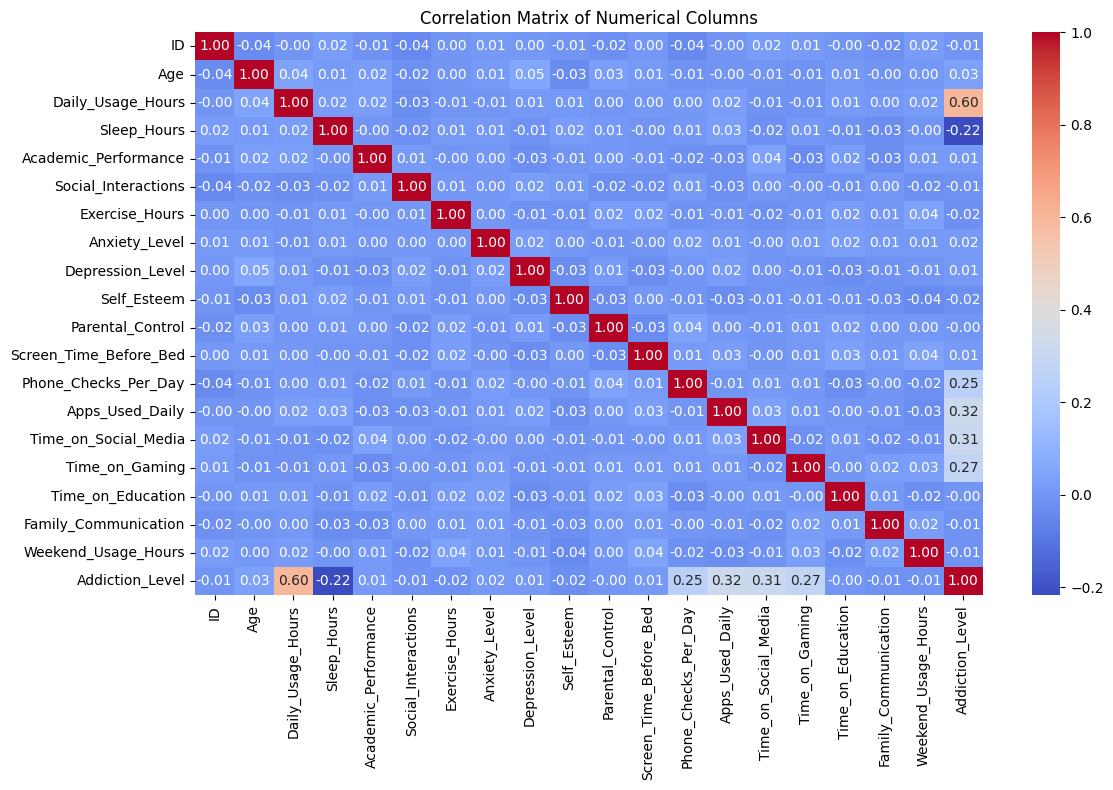

In [ ]:
# Select only numerical columns for correlation analysis
numerical_cols_for_corr = df.select_dtypes(include=np.number).columns

# Calculate the correlation matrix
correlation_matrix = df[numerical_cols_for_corr].corr()

# Display the correlation matrix
print("Correlation Matrix:")
display(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns')
plt.tight_layout()
plt.show()